In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MMAction2 Tutorial

Welcome to MMAction2! This is the official colab tutorial for using MMAction2. In this tutorial, you will learn
- Perform inference with a MMAction2 recognizer.
- Train a new recognizer with a new dataset.


Let's start!

## Install MMAction2

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (if your colab has CUDA 11.8)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
# install MMEngine, MMCV and MMDetection using MIM
%pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

# Install mmaction2
!rm -rf mmaction2
!git clone https://github.com/open-mmlab/mmaction2.git -b main
%cd mmaction2

!pip install -e .

# Install some optional requirements
!pip install -r requirements/optional.txt

!mim install mmdet
!mim install mmpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.1/450.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 31.3 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 17.3 MB/s eta 0:00:00
Cloning into 'mmaction2'...
remote: Enumerating objects: 22864, done.
remote: Total 22864 (delta 0), reused 0 (delta 0), pack-reused 22864
Receiving objects: 100% (22864/22864), 69.62 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (16106/16106), done.
/content/mmaction2
Obtaining file:///content/mmaction2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.4 MB/s eta 0:00:00
  Running setup.py develop for mmaction2
     ━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMAction2 installation
import mmaction
print(mmaction.__version__)

# Check MMCV installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check MMEngine installation
from mmengine.utils.dl_utils import collect_env
print(collect_env())

2.1.0+cu118 True
1.2.0
11.8
GCC 9.3
OrderedDict([('sys.platform', 'linux'), ('Python', '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]'), ('CUDA available', True), ('numpy_random_seed', 2147483648), ('GPU 0', 'Tesla T4'), ('CUDA_HOME', '/usr/local/cuda'), ('NVCC', 'Cuda compilation tools, release 11.8, V11.8.89'), ('GCC', 'x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0'), ('PyTorch', '2.1.0+cu118'), ('PyTorch compiling details', 'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201703\n  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.8\n  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_

## Perform inference with a MMAction2 recognizer
MMAction2 already provides high level APIs to do inference and training.

In [5]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmaction/recognition/tsn/tsn_r50_1x1x3_100e_kinetics400_rgb/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth \
      -O checkpoints/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth

--2023-11-15 10:58:02--  https://download.openmmlab.com/mmaction/recognition/tsn/tsn_r50_1x1x3_100e_kinetics400_rgb/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 192.169.122.215, 192.169.122.214, 192.169.122.212, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|192.169.122.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97579339 (93M) [application/octet-stream]
Saving to: ‘checkpoints/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth’

checkpoints/tsn_r50 100%[===================>]  93.06M  27.2MB/s    in 3.4s    

2023-11-15 10:58:06 (27.3 MB/s) - ‘checkpoints/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth’ saved [97579339/97579339]



In [6]:
from mmaction.apis import inference_recognizer, init_recognizer
from mmengine import Config


# Choose to use a config and initialize the recognizer
config = 'configs/recognition/tsn/tsn_imagenet-pretrained-r50_8xb32-1x1x3-100e_kinetics400-rgb.py'
config = Config.fromfile(config)
# Setup a checkpoint file to load
checkpoint = 'checkpoints/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth'
# Initialize the recognizer
model = init_recognizer(config, checkpoint, device='cuda:0')

Loads checkpoint by local backend from path: checkpoints/tsn_r50_1x1x3_100e_kinetics400_rgb_20200614-e508be42.pth


In [7]:
# Use the recognizer to do inference
from operator import itemgetter
video = 'demo/demo.mp4'
label = 'tools/data/kinetics/label_map_k400.txt'
results = inference_recognizer(model, video)

pred_scores = results.pred_scores.item.tolist()
score_tuples = tuple(zip(range(len(pred_scores)), pred_scores))
score_sorted = sorted(score_tuples, key=itemgetter(1), reverse=True)
top5_label = score_sorted[:5]

labels = open(label).readlines()
labels = [x.strip() for x in labels]
results = [(labels[k[0]], k[1]) for k in top5_label]


11/15 10:58:56 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
11/15 10:58:56 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.


AttributeError: ignored

In [ ]:
print('The top-5 labels with corresponding scores are:')
for result in results:
    print(f'{result[0]}: ', result[1])

The top-5 labels with corresponding scores are:
arm wrestling:  1.0
rock scissors paper:  6.434453414527752e-09
shaking hands:  2.7599860175087088e-09
clapping:  1.3454612979302283e-09
massaging feet:  5.555100823784187e-10


### 動画データの読み込み

In [8]:
import os
import csv
import pandas as pd

def get_csv_data(dataset_root, csv_file_name, display_csv=True):
    dataset_path = os.path.join(dataset_root, csv_file_name)
    print('データセットパス : ', dataset_path)

    df = pd.read_csv(dataset_path)

    if display_csv:
        display(df)

    return dataset_path, df

def get_label(df):
    label = int(df["label"])
    return label

def add_csv_data(output_path, result_list):
    feature_list = []
    feature_list.extend(result_list)

    with open(output_path, 'a') as cf:
        csv_writer = csv.writer(cf)
        csv_writer.writerow(feature_list)

In [9]:
data_target = "test"

In [ ]:
# CSVデータ読み込み
dataset_root = "/content/drive/MyDrive/D3/2本目/mmaction_datasets/hop_pike_knee_angle"

dataset_path, df = get_csv_data(dataset_root, f'{data_target}_labels_based_knee_angle.csv', display_csv=True)


データセットパス :  /content/drive/MyDrive/D3/2本目/mmaction_datasets/hop_pike_knee_angle/test_labels_based_knee_angle.csv


,video,label
0,GH010320_1_mmaction_takeoff_pike_5_76.mp4,0
1,GH010320_2_mmaction_takeoff_pike_4_78.mp4,0
2,GH010322_mmaction_takeoff_pike_0_77.mp4,0
3,GH010324_1_mmaction_takeoff_pike_1_74.mp4,1
4,GH010324_2_mmaction_takeoff_pike_10_89.mp4,0
5,GH010330_mmaction_takeoff_pike_8_71.mp4,0
6,GH010331_1_mmaction_takeoff_pike_5_76.mp4,0
7,GH010331_2_mmaction_takeoff_pike_7_81.mp4,1
8,GH010659_mmaction_takeoff_pike_8_83.mp4,1
9,GH010660_mmaction_takeoff_pike_9_81.mp4,1


### 動画の複製

In [ ]:
import os

save_dir = "knee_angle"

root_path = f"/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/{save_dir}"
os.makedirs(root_path, exist_ok=True)

dest_root = os.path.join(root_path, data_target)
os.makedirs(dest_root, exist_ok=True)

# pickleデータ保存用
pickle_dest_root = os.path.join(root_path, f"{data_target}_anno")
os.makedirs(pickle_dest_root, exist_ok=True)


# 動画のコピー元ディレクトリパス
videos_dir_path = f"/content/drive/MyDrive/D3/2本目/mmaction_datasets/hop_pike_knee_angle/{data_target}"

In [ ]:
#!rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/test

In [ ]:
import shutil

video_labels_names_list = []
for name, label in zip(df["video"], df["label"]):
    original_path = os.path.join(videos_dir_path, name)
    if os.path.isfile(original_path):

        base, ext = os.path.splitext(name)
        new_name = base+f"_{label}{ext}"
        print(new_name)
        video_labels_names_list.append(new_name)

        dest_path = os.path.join(dest_root, new_name) # コピー先ではラベル付の名前として保存する

        shutil.copy(original_path, dest_path)


GH010320_1_mmaction_takeoff_pike_5_76_0.mp4
GH010320_2_mmaction_takeoff_pike_4_78_0.mp4
GH010322_mmaction_takeoff_pike_0_77_0.mp4
GH010324_1_mmaction_takeoff_pike_1_74_1.mp4
GH010324_2_mmaction_takeoff_pike_10_89_0.mp4
GH010330_mmaction_takeoff_pike_8_71_0.mp4
GH010331_1_mmaction_takeoff_pike_5_76_0.mp4
GH010331_2_mmaction_takeoff_pike_7_81_1.mp4
GH010659_mmaction_takeoff_pike_8_83_1.mp4
GH010660_mmaction_takeoff_pike_9_81_1.mp4
GH010661_mmaction_takeoff_pike_8_90_1.mp4
GH010662_mmaction_takeoff_pike_6_80_1.mp4
GH010665_mmaction_takeoff_pike_6_107_1.mp4
GH010666_mmaction_takeoff_pike_10_84_1.mp4
GH010667_mmaction_takeoff_pike_6_80_1.mp4
GH010668_mmaction_takeoff_pike_9_85_1.mp4
GH010671_mmaction_takeoff_pike_10_86_0.mp4
GH010672_mmaction_takeoff_pike_8_84_1.mp4
GH010673_mmaction_takeoff_pike_7_83_1.mp4
GH010674_mmaction_takeoff_pike_5_82_1.mp4
GH010675_mmaction_takeoff_pike_8_87_1.mp4
GH010676_mmaction_takeoff_pike_8_92_1.mp4
GH010677_mmaction_takeoff_pike_7_90_1.mp4
GH010678_mmaction_

In [ ]:
len(video_labels_names_list)

34

### 各動画から姿勢特徴量をpickleファイルに抽出（ntu_pose_extraction.pyの変更を忘れないこと）

In [ ]:
# import os.path as osp

# vid = "/content/mmaction2/GH010659_mmaction_takeoff_pike_8_83_1.mp4"

# # Paste below in the line #281 of ntu_pose_extraction.py
# int(osp.basename(vid).rsplit('_', 1)[1][:1])

# /content/mmaction2/tools/data/skeleton/ntu_pose_extraction.py

1

In [ ]:
# !rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/train_anno
# !rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/val_anno

In [ ]:
%cd /content/mmaction2

cnt = 1
for video_name in video_labels_names_list:
    video_path = os.path.join(dest_root, video_name)
    #print(video_path)
    base_n = os.path.basename(video_path).rsplit('.', 1)[0] + ".pkl"
    print(f"\nNo. : {cnt} / {len(video_labels_names_list)}")

    pickle_path = os.path.join(pickle_dest_root, base_n)
    !python tools/data/skeleton/ntu_pose_extraction.py --skip-postproc "$video_path" "$pickle_path"
    cnt += 1

/content/mmaction2

No. : 1 / 34
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco-person/faster_rcnn_r50_fpn_1x_coco-person_20201216_175929-d022e227.pth
Performing Human Detection for each frame
[                                                  ] 0/72, elapsed: 0s, ETA:10/09 06:00:49 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
10/09 06:00:49 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
[>>] 72/72, 8.1 task/s, elapsed: 9s, ETA:     0s
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth
/usr/local/lib/python3.10/dist-packages/mmpose/apis/inference.py:120: UserWarning: Can not load dataset_meta from the checkpoint or the model config.

### 空データの排除

In [ ]:
# !rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/empty/train
# !rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/empty/val

In [ ]:
data_target = "train" # select the data type (train, test, val)

In [ ]:
import os
import pickle
import shutil

root = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"

pkl_root = os.path.join(root, f"{data_target}_anno")

empty_data_dir = "empty"
empty_data_dst = os.path.join(root, empty_data_dir, data_target)

os.makedirs(empty_data_dst, exist_ok=True)

for pkl_file_name in os.listdir(pkl_root):
  pkl_file_path = os.path.join(pkl_root, pkl_file_name)

  if pkl_file_path.endswith(".pkl"):

    with open(pkl_file_path, mode="rb") as f:
        tmp_pkl = pickle.load(f)

        if tmp_pkl['keypoint'].all() == 0:
            print(os.path.basename(pkl_file_path))
            #print(tmp_pkl['keypoint'])
            shutil.move(pkl_file_path, empty_data_dst)

GH010583_mmaction_takeoff_pike_7_92_1.pkl
GH010586_mmaction_takeoff_pike_11_87_1.pkl
GH010601_mmaction_takeoff_pike_11_97_1.pkl
GH010602_mmaction_takeoff_pike_16_101_1.pkl


### pickleファイルを一つにまとめる

In [ ]:
# import mmengine

# for d_type in ["train", "val"]:

#     root_path = f"/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/{save_dir}"
#     pickle_dest_root = os.path.join(root_path, f"{d_type}_anno")
#     output_path = os.path.join(root_path, f"custom_dataset_{d_type}.pkl")

#     result = []
#     for file_name in os.listdir(pickle_dest_root):
#         pkl_path = os.path.join(pickle_dest_root, file_name)

#         if os.path.isfile(pkl_path):
#             data = mmengine.load(pkl_path)
#             result.append(data)

#     mmengine.dump(result, output_path)

In [ ]:
save_dir = "knee_angle" # データセット名

In [ ]:
import os
import pickle

pickle_split_dic = {} # split用
pickle_anno_list = [] # annotation用

for d_type in ["train", "val", "test"]:

    root_path = f"/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/{save_dir}"
    pickle_dest_root = os.path.join(root_path, f"{d_type}_anno")

    tmp_list = []
    for file_name in os.listdir(pickle_dest_root):
        file_path = os.path.join(pickle_dest_root, file_name)

        if os.path.isfile(file_path):
            #print(file_path)
            #tmp_list.append(file_path) # 絶対パス

            base_n = file_name.rsplit('.', 1)[0]
            tmp_list.append(base_n) # 相対パス
            #print(base_n)

            # pickleファイル読み込み
            with open(file_path, mode="rb+") as f:
                tmp_dict = pickle.load(f)
                pickle_anno_list.append(tmp_dict)

    pickle_split_dic[f"xsub_{d_type}"] = tmp_list

pickle_split_dic

{'xsub_train': ['GH010550_mmaction_takeoff_pike_51_129_1',
  'GH010551_mmaction_takeoff_pike_55_136_1',
  'GH010552_mmaction_takeoff_pike_50_119_0',
  'GH010553_mmaction_takeoff_pike_48_131_0',
  'GH010554_mmaction_takeoff_pike_67_144_0',
  'GH010556_mmaction_takeoff_pike_70_147_0',
  'GH010557_mmaction_takeoff_pike_56_141_1',
  'GH010558_mmaction_takeoff_pike_47_125_1',
  'GH010560_mmaction_takeoff_pike_17_95_1',
  'GH010561_mmaction_takeoff_pike_62_137_1',
  'GH010580_mmaction_takeoff_pike_9_86_1',
  'GH010581_mmaction_takeoff_pike_14_97_1',
  'GH010582_mmaction_takeoff_pike_13_90_1',
  'GH010587_mmaction_takeoff_pike_6_79_1',
  'GH010589_mmaction_takeoff_pike_10_88_1',
  'GH010590_mmaction_takeoff_pike_10_85_1',
  'GH010591_mmaction_takeoff_pike_10_58_1',
  'GH010593_mmaction_takeoff_pike_11_82_0',
  'GH010594_mmaction_takeoff_pike_12_88_0',
  'GH010595_mmaction_takeoff_pike_9_87_1',
  'GH010596_mmaction_takeoff_pike_11_87_1',
  'GH010597_mmaction_takeoff_pike_12_127_1',
  'GH010598

In [ ]:
pickle_anno_list

[{'keypoint': array([[[[1731.3888 ,  528.82697],
           [1739.1172 ,  517.23425],
           [1731.3888 ,  517.23425],
           ...,
           [1831.859  ,  780.0028 ],
           [1793.2167 ,  834.10223],
           [1913.0082 ,  845.69495]],
  
          [[1712.8414 ,  524.615  ],
           [1720.6704 ,  516.78595],
           [1712.8414 ,  516.78595],
           ...,
           [1818.5333 ,  771.2294 ],
           [1748.072  ,  837.77606],
           [1900.738  ,  837.77606]],
  
          [[1694.8053 ,  524.72864],
           [1702.6835 ,  512.9113 ],
           [1690.8661 ,  516.8504 ],
           ...,
           [1801.1615 ,  768.95416],
           [1706.6226 ,  847.7366 ],
           [1883.883  ,  831.98004]],
  
          ...,
  
          [[ 709.8728 ,  264.31012],
           [ 703.2492 ,  257.68658],
           [ 703.2492 ,  257.68658],
           ...,
           [ 805.91425,  241.1277 ],
           [ 895.3322 ,  323.9221 ],
           [ 868.838  ,  323.9221 ]],
  
  

### データセット用pickleを作成

In [ ]:
pickle_dataset = {
    "split": pickle_split_dic,
    "annotations": pickle_anno_list
}

pickle_save_path = os.path.join(root_path, f"{save_dir}_custom_data.pkl")

with open(pickle_save_path, 'wb') as p:
    pickle.dump(pickle_dataset, p)

In [ ]:
# import mmengine

# mmengine.dump(pickle_dataset, "/content/mmaction2/knee_angle_custom_data2.pkl")

### 学習

In [ ]:
# 自作loopsをコピー
!rm /usr/local/lib/python3.10/dist-packages/mmengine/runner/loops.py
!cp /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/loops.py /usr/local/lib/python3.10/dist-packages/mmengine/runner/

In [ ]:
# !rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/models

In [ ]:
import os

wd_root = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"
wd_path = os.path.join(wd_root, "models")
os.makedirs(wd_path, exist_ok=True)

config_name = "slowonly_r50_8xb16-u48-240e_ntu60-xsub-keypoint.py"
config_path = os.path.join(wd_root, config_name)

# csv保存先
root_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"
csv_name = "val_loss.csv"
csv_val_path = os.path.join(root_path, csv_name)

# csv特徴量
row_list = ["loss"]

if not os.path.exists(csv_val_path):
    with open(csv_val_path, "w") as cf:
        cw = csv.writer(cf)
        cw.writerow(row_list)

In [ ]:
%cd /content/mmaction2
%env CUBLAS_WORKSPACE_CONFIG=:4096:8
!CUDA_LAUNCH_BLOCKING=1 python tools/train.py \
    --work-dir $wd_path \
    --seed 0 \
    $config_path

/content/mmaction2
env: CUBLAS_WORKSPACE_CONFIG=:4096:8
10/09 07:44:40 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arc

### train & val損失可視化

In [ ]:
!rm /content/mmaction2/tools/analysis_tools/analyze_logs.py
!cp /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/analyze_logs.py /content/mmaction2/tools/analysis_tools/

In [ ]:
import os

json_root = os.path.join(wd_path, "20231009_074439", "vis_data")
json_name = "20231009_074439.json"
json_path = os.path.join(json_root, json_name)

output_image_path = "/content/loss_result.png"
plot_title = "Loss"

In [ ]:
# train loss csv保存先
root_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"
csv_name = "train_loss.csv"
csv_train_path = os.path.join(root_path, csv_name)

# csv特徴量
row_list = ["loss"]

if not os.path.exists(csv_train_path):
    with open(csv_train_path, "w") as cf:
        cw = csv.writer(cf)
        cw.writerow(row_list)

In [ ]:
!python tools/analysis_tools/analyze_logs.py plot_curve \
    $json_path \
    --keys loss \
    --legend loss \
    --title $plot_title \
    --out $output_image_path \
    --csv_output_path $csv_save_path

plot curve of /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/models/20231009_074439/vis_data/20231009_074439.json, metric is loss
loss:  1.2244985222816467
loss:  0.7524560108780861
loss:  0.7599998049437999
loss:  0.6421472936868667
loss:  0.6340290009975433
loss:  0.687852093577385
loss:  0.7242692515254021
loss:  0.6355397187173366
loss:  0.699304336309433
loss:  0.6711425632238388
loss:  0.6553850010037422
loss:  0.6509814560413361
loss:  0.695934297144413
loss:  0.6041063793003559
loss:  0.5940361589193344
loss:  0.7109995931386948
loss:  0.6656456306576729
loss:  0.6439286425709725
loss:  0.599443556368351
loss:  0.5153215855360032
loss:  0.6534460082650184
loss:  0.6823706299066543
loss:  0.6817786768078804
loss:  0.6372509822249413
loss:  0.609259195625782
loss:  0.5826900213956833
loss:  0.6043741658329964
loss:  0.5856841981410981
loss:  0.5124575585126877
loss:  0.4579969450831413
loss:  0.5317402109503746
loss:  0.46090514659881593
loss:  0.4918190501630306

In [ ]:
import pandas as pd

df_val = pd.read_csv(csv_val_path)
display(df_val.head())

df_train = pd.read_csv(csv_train_path)
display(df_train.head())

,loss
0,1.313262
1,0.493022
2,0.490668
3,0.542433
4,0.585095


,loss
0,1.224499
1,0.752456
2,0.760000
3,0.642147
4,0.634029


In [ ]:
# loss 画像の保存先
root_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"
loss_name = "train_val_loss.png"
loss_image_path = os.path.join(root_path, loss_name)

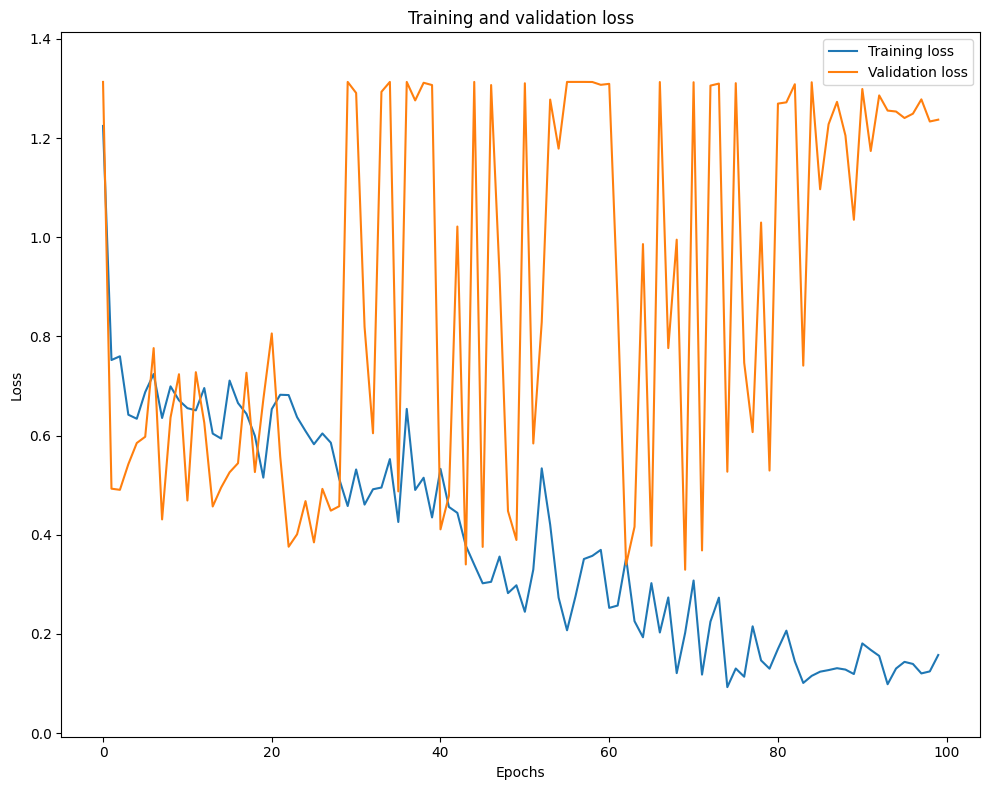

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

ax = plt.subplot(111)
ax.set_ylim(df_train["loss"].min()-0.1 , df_val["loss"].max()+0.1)

plt.plot(df_train["loss"], label="Training loss")
plt.plot(df_val["loss"], label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig(loss_image_path)
plt.show()

In [ ]:
val_min = df_val["loss"].min()
print('VAL 損失の最小値: ', val_min)

target_epoch_idx = df_val.query(f'loss == {val_min}').index.tolist()[0]
print("使用すべきエポック数: ", target_epoch_idx)

VAL 損失の最小値:  0.3295837
使用すべきエポック数:  69


In [ ]:
#!cp /content/mmaction2/tools/analysis_tools/analyze_logs.py /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle

### テストデータでモデルを評価

In [ ]:
# 自作loopsをコピー
!rm /usr/local/lib/python3.10/dist-packages/mmengine/runner/loops.py
!cp /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/loops.py /usr/local/lib/python3.10/dist-packages/mmengine/runner/

In [ ]:
import os

eval_path = os.path.join(wd_root, "eval")
os.makedirs(eval_path, exist_ok=True)

# 評価用ファイルの保存先
pickle_save_path = os.path.join(eval_path, "test_results.pkl")

# 使用する学習済みモデル
ckpt_model_name = f"epoch_{target_epoch_idx}.pth"
ckpt_model_path = os.path.join(wd_path, ckpt_model_name)
print('使用するモデル名: ', ckpt_model_name)

使用するモデル名:  epoch_69.pth


In [ ]:
# csv保存先
root_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"

csv_test_name = "test_pred.csv"
csv_test_path = os.path.join(root_path, csv_test_name)

# csv特徴量
row_list = ["true", "pred"]

if not os.path.exists(csv_test_path):
    with open(csv_test_path, "w") as cf:
        cw = csv.writer(cf)
        cw.writerow(row_list)

In [ ]:
%cd /content/mmaction2
#%env CUBLAS_WORKSPACE_CONFIG=:4096:8
!CUDA_LAUNCH_BLOCKING=1 python tools/test.py \
    --work-dir "$eval_path" \
    --dump "$pickle_save_path" \
    "$config_file_path" \
    "$ckpt_model_path" \
    --cfg-options test_dataloader.dataset.split='xsub_test'

/content/mmaction2
10/09 13:24:16 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch

In [ ]:
# !rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/eval

### 混同行列の可視化

In [ ]:
import os
import json

eval_result_name = "20231009_132415"
json_file_path = os.path.join(eval_path, eval_result_name, f"{eval_result_name}.json")

with open(json_file_path, "r") as f:
    test_results_dict = json.load(f)

cm_json = test_results_dict["confusion_matrix/result"]

In [ ]:
# 混同行列保存先
cm_save_path = os.path.join(eval_path, "confusion_matrix.png")

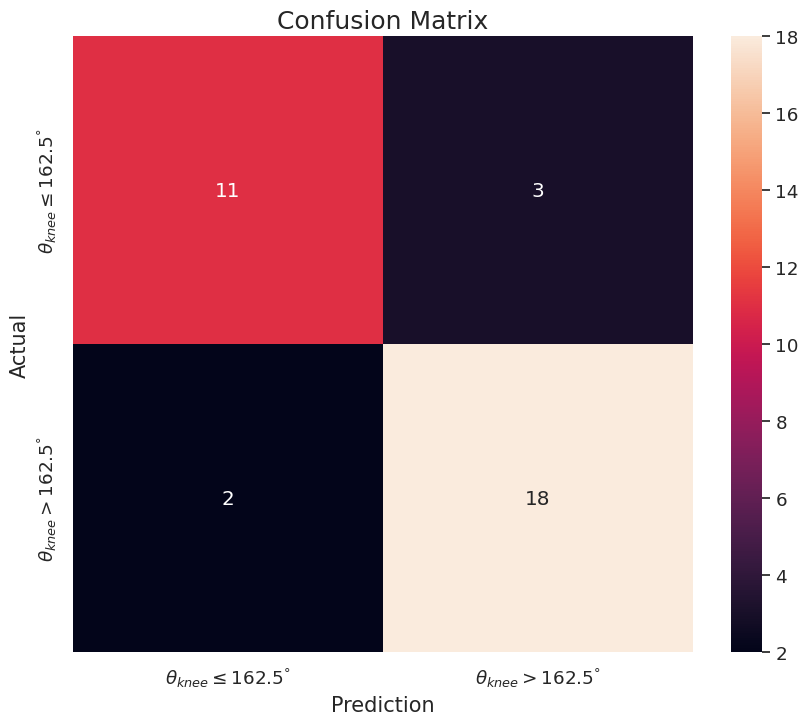

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#cm = confusion_matrix(actual, predicted)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale=1.2)

labels = [r"$\theta_{knee} \leq {162.5}^{\degree}$",  r"$\theta_{knee} > {162.5}^{\degree}$"]
sns.heatmap(cm_json, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, )

label_size = 15
plt.xlabel('Prediction',fontsize=label_size)
plt.ylabel('Actual',fontsize=label_size)
plt.title('Confusion Matrix', fontsize=label_size+3)

plt.savefig(cm_save_path)
plt.show()

### 評価指標でモデルを評価

In [ ]:
# テストラベル 0: 14, 1: 20
TN = cm_json[0][0]
FP = cm_json[0][1]

FN = cm_json[1][0]
TP = cm_json[1][1]

print(f'TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}')

TN: 11, FP: 3, FN: 2, TP: 18


In [ ]:
# accuracy
# (TP+TN) / (TP+TN+FP+FN)
acc = (TP+TN) / (TP+TN+FP+FN)
print('acc: ', acc)

# precision
# TP / (TP + FP)
precision = TP / (TP + FP)
print('precision: ', precision)

# recall
# TP / (TP + FN)
recall = TP / (TP + FN)
print('recall: ', recall)

# F1 score
# 2 * (precision * recall) / (precision + recall) = 1 / (1/2)((1/recall) + (1/precision))
f1_socre = 2 * (precision * recall) / (precision + recall)
print('f1_socre: ', f1_socre)

acc:  0.8529411764705882
precision:  0.8571428571428571
recall:  0.9
f1_socre:  0.8780487804878048


### 評価指標（ダブルチェック）

In [ ]:
import pandas as pd

df_test = pd.read_csv(csv_test_path)
display(df_test.head())

,true,pred
0,0,0
1,0,1
2,0,1
3,1,1
4,0,0


In [ ]:
y_test = df_test["true"]
y_pred = df_test["pred"]

print("y_test: ", y_test.tolist())
print("y_pred: ", y_pred.tolist())

y_test:  [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
y_pred:  [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]


In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)

# sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
# #plt.savefig('/content/sklearn_confusion_matrix.png')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sk_acc = accuracy_score(y_test, y_pred)
sk_precision = precision_score(y_test, y_pred)
sk_recall = recall_score(y_test, y_pred)
sk_f1 = f1_score(y_test, y_pred)

print("正解率: ", sk_acc)
print("適合率: ", sk_precision)
print("再現率: ", sk_recall)
print("F1値: ", sk_f1)

assert acc == sk_acc, f'期待する値[{sk_acc}], 入力値[{acc}]'
assert precision == sk_precision, f'期待する値[{sk_precision}], 入力値[{precision}]'
assert recall == sk_recall, f'期待する値[{sk_recall}], 入力値[{recall}]'
assert f1_socre == sk_f1, f'期待する値[{sk_f1}], 入力値[{f1_socre}]'

正解率:  0.8529411764705882
適合率:  0.8571428571428571
再現率:  0.9
F1値:  0.8780487804878048


### どのデータの予測を外したか（FPとFN）

In [ ]:
import pandas as pd

# 動画名とラベルが記録されたcsvを指定（ラベル列を軸に結合したいから）
test_dataset_original_path = "/content/drive/MyDrive/D3/2本目/mmaction_datasets/hop_pike_knee_angle/test_labels_based_knee_angle.csv"

df_test_original = pd.read_csv(test_dataset_original_path)
#df_test_original.rename(columns={'label': 'true'}, inplace=True)
display(df_test_original.head())

print('\nテストデータの数: ', len(df_test_original))

,video,label
0,GH010320_1_mmaction_takeoff_pike_5_76.mp4,0
1,GH010320_2_mmaction_takeoff_pike_4_78.mp4,0
2,GH010322_mmaction_takeoff_pike_0_77.mp4,0
3,GH010324_1_mmaction_takeoff_pike_1_74.mp4,1
4,GH010324_2_mmaction_takeoff_pike_10_89.mp4,0



テストデータの数:  34


In [ ]:
df_test = df_test.eval('flag = true == pred')
#display(df_test)

condition = df_test["flag"] # 条件（正解と予測が一致した動画）

precise_pred_n = condition.sum()
print(f"正しく予測できた数: {precise_pred_n} / {len(df_test)}")

index_list = df_test[df_test["flag"]==True].index.tolist()
print('\n差分動画の分析対象index: ', index_list)

正しく予測できた数: 29 / 34

差分動画の分析対象index:  [0, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33]


In [ ]:
# テストデータの詳細をcsvに保存
root_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"

new_test_name = "test_results.csv"
new_test_path = os.path.join(root_path, new_test_name)

# 予測に失敗したデータ
pred_fail_name = "test_prediction_fail.csv"
pred_fail_path = os.path.join(root_path, pred_fail_name)

# 予測に成功したデータ
pred_success_name = "test_prediction_success.csv"
pred_success_path = os.path.join(root_path, pred_success_name)

In [ ]:
df_new = pd.concat([df_test_original, df_test], axis=1)
display(df_new)

print("\n各列の欠損の数: ", df_new.isnull().sum().tolist())

#df_new.to_csv(new_test_path, index=False)

,video,label,true,pred,flag
0,GH010320_1_mmaction_takeoff_pike_5_76.mp4,0,0,0,True
1,GH010320_2_mmaction_takeoff_pike_4_78.mp4,0,0,1,False
2,GH010322_mmaction_takeoff_pike_0_77.mp4,0,0,1,False
3,GH010324_1_mmaction_takeoff_pike_1_74.mp4,1,1,1,True
4,GH010324_2_mmaction_takeoff_pike_10_89.mp4,0,0,0,True
5,GH010330_mmaction_takeoff_pike_8_71.mp4,0,0,0,True
6,GH010331_1_mmaction_takeoff_pike_5_76.mp4,0,0,1,False
7,GH010331_2_mmaction_takeoff_pike_7_81.mp4,1,1,1,True
8,GH010659_mmaction_takeoff_pike_8_83.mp4,1,1,1,True
9,GH010660_mmaction_takeoff_pike_9_81.mp4,1,1,1,True



各列の欠損の数:  [0, 0, 0, 0, 0]


In [ ]:
#display(df_test)

# 予測が一致しなかった動画データの一覧
df_fail = df_new[~condition]

#df_fail.to_csv(pred_fail_path, index=False)
df_fail

,video,label,true,pred,flag
1,GH010320_2_mmaction_takeoff_pike_4_78.mp4,0,0,1,False
2,GH010322_mmaction_takeoff_pike_0_77.mp4,0,0,1,False
6,GH010331_1_mmaction_takeoff_pike_5_76.mp4,0,0,1,False
10,GH010661_mmaction_takeoff_pike_8_90.mp4,1,1,0,False
25,GH010680_mmaction_takeoff_pike_8_108.mp4,1,1,0,False


In [ ]:
# 予測が一致した動画データの一覧（6フレームの差分動画作成に使用）
df_success = df_new[condition]

df_success.to_csv(pred_success_path, index=False)
len(df_success)

29

### 膝角度などの分散を確認

In [ ]:
#!cp /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle_old/loops.py /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle

In [ ]:
#/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/knee_angle_custom_data.pkl

In [ ]:
#!wget https://download.openmmlab.com/mmaction/v1.0/skeleton/posec3d/slowonly_r50_8xb16-u48-240e_gym-keypoint/slowonly_r50_8xb16-u48-240e_gym-keypoint_20220815-da338c58.pth -O /content/drive/MyDrive/D3/2本目/mmaction/slowonly_r50_8xb16-u48-240e_gym-keypoint.pth

--2023-09-20 11:02:23--  https://download.openmmlab.com/mmaction/v1.0/skeleton/posec3d/slowonly_r50_8xb16-u48-240e_gym-keypoint/slowonly_r50_8xb16-u48-240e_gym-keypoint_20220815-da338c58.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.81.216, 163.181.81.212, 163.181.81.211, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.81.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8326969 (7.9M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/D3/2本目/mmaction/slowonly_r50_8xb16-u48-240e_gym-keypoint.pth’

/content/drive/MyDr 100%[===================>]   7.94M  25.1MB/s    in 0.3s    

2023-09-20 11:02:24 (25.1 MB/s) - ‘/content/drive/MyDrive/D3/2本目/mmaction/slowonly_r50_8xb16-u48-240e_gym-keypoint.pth’ saved [8326969/8326969]



In [ ]:
# knee angle old result
# %cd /content/mmaction2
# %env CUBLAS_WORKSPACE_CONFIG=:4096:8
# !CUDA_LAUNCH_BLOCKING=1 python tools/train.py --work-dir $wd_root --seed 0 \
# configs/skeleton/posec3d/slowonly_r50_8xb16-u48-240e_ntu60-xsub-keypoint.py

/content/mmaction2
env: CUBLAS_WORKSPACE_CONFIG=:4096:8
09/20 11:03:14 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arc

In [ ]:
#!cp -r /content/mmaction2/knee_angle_from_pretrained_gym /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/trained_models

In [ ]:
import csv

def add_csv_data(output_path, result_list):
    feature_list = []
    feature_list.extend(result_list)

    with open(output_path, 'a') as cf:
        csv_writer = csv.writer(cf)
        csv_writer.writerow(feature_list)

In [ ]:
# csv保存先
csv_path = os.path.join("/content", f"val_video_action_labels.csv")
# csv特徴量
row_list = ["video", "pred", "true"]

if not os.path.exists(csv_path):
    with open(csv_path, "w") as cf:
        cw = csv.writer(cf)
        cw.writerow(row_list)

In [ ]:
import os

models_root = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle_old/trained_models/knee_angle_from_pretrained_gym"

config_file_name = "slowonly_r50_8xb16-u48-240e_ntu60-xsub-keypoint.py"
config_file_path = os.path.join(models_root, config_file_name)

ckpt_model_name = "best_acc_top1_epoch_17.pth"
ckpt_model_path = os.path.join(models_root, ckpt_model_name)

label_map_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/label_map_knee_angle.txt"

videos_root = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/val"
video_list = os.listdir(videos_root)

In [ ]:
for video_name in video_list:
    video_path = os.path.join(videos_root, video_name)

    output_path = f"/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/demo3_{video_name}"

    !python demo/demo_skeleton.py \
        --config "$config_file_path" \
        --checkpoint "$ckpt_model_path" \
        --label-map "$label_map_path" \
        "$video_path" "$output_path" "$csv_path"

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!cp "/content/mmaction2/demo/demo_skeleton.py" "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"
!cp "$csv_path" "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle"

### 個別動画に

In [ ]:
import os

models_root = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/trained_models/knee_angle_from_pretrained_gym"

config_file_name = "slowonly_r50_8xb16-u48-240e_ntu60-xsub-keypoint.py"
config_file_path = os.path.join(models_root, config_file_name)

ckpt_model_name = "best_acc_top1_epoch_17.pth"
ckpt_model_path = os.path.join(models_root, ckpt_model_name)

label_map_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/label_map_knee_angle.txt"

video_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/val/GH010320_1_mmaction_takeoff_pike_5_76_0.mp4"
video_name = os.path.basename(video_path)

output_path = f"/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/demo3_{video_name}"

#cam_output_path = f"/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/cam2_{video_name}"

### モデルの評価

In [ ]:
#!cp $ckpt_model_path /content/mmaction2

In [ ]:
import os

wd_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/eval"
os.makedirs(wd_path, exist_ok=True)

# 評価用ファイルの保存先
pickle_save_path = os.path.join(wd_path, "test_results.pkl")

In [ ]:
#!rm -r /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/eval

In [ ]:
# 自作評価モジュールをコピー（適合率, 再現率, F値）
# !rm /content/mmaction2/mmaction/evaluation/metrics/acc_metric.py
# !cp /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/eval/acc_metric.py /content/mmaction2/mmaction/evaluation/metrics

In [ ]:
%cd /content/mmaction2
#%env CUBLAS_WORKSPACE_CONFIG=:4096:8
!CUDA_LAUNCH_BLOCKING=1 python tools/test.py \
    --work-dir "$wd_path" \
    --dump "$pickle_save_path" \
    "$config_file_path" \
    "$ckpt_model_path"

/content/mmaction2
10/05 11:21:54 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch

In [ ]:
#!cp /content/mmaction2/mmaction/evaluation/metrics/acc_metric.py /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/eval


In [ ]:
import os

json_file_path = os.path.join(wd_path, "20231005_083631", "20231005_083631.json")

In [ ]:
import json

with open(json_file_path, "r") as f:
    test_results_dict = json.load(f)

cm_json = test_results_dict["confusion_matrix/result"]

tensor([[ 8,  6],
        [ 2, 18]])


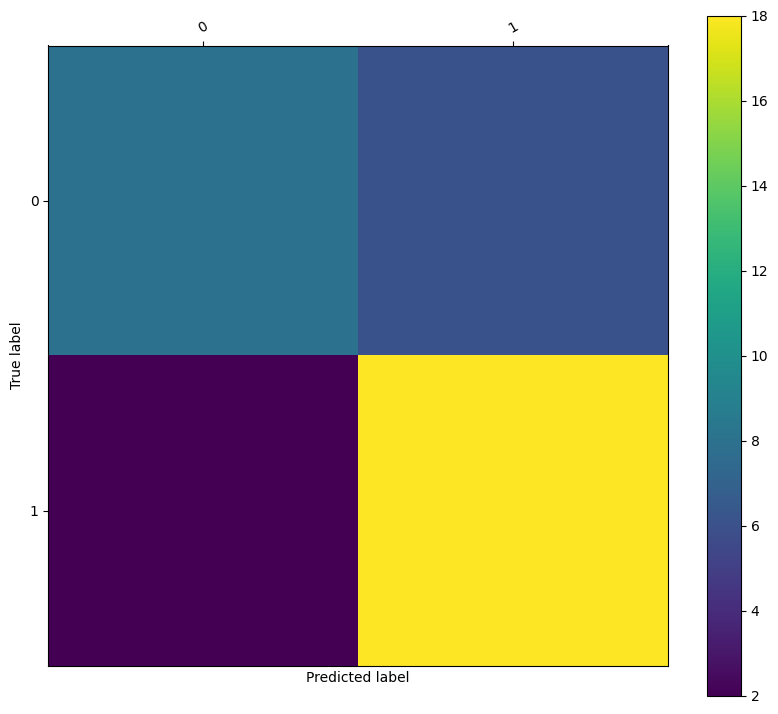

In [ ]:
import torch
from mmaction.evaluation import ConfusionMatrix
import matplotlib.pyplot as plt

# y_pred = [0, 1, 1, 3]
# y_true = [0, 2, 1, 3]
# ConfusionMatrix.calculate(y_pred, y_true, num_classes=4)

# plot the confusion matrix
# y_score = torch.rand((1000, 10))
# y_true = torch.randint(10, (1000, ))
# matrix = ConfusionMatrix.calculate(y_score, y_true)
print(torch.tensor(cm_json))

matrix = torch.tensor(cm_json)

ConfusionMatrix().plot(matrix)
plt.show()

In [ ]:
plot_save_path = os.path.join(wd_path, "confusion_matrix.png")

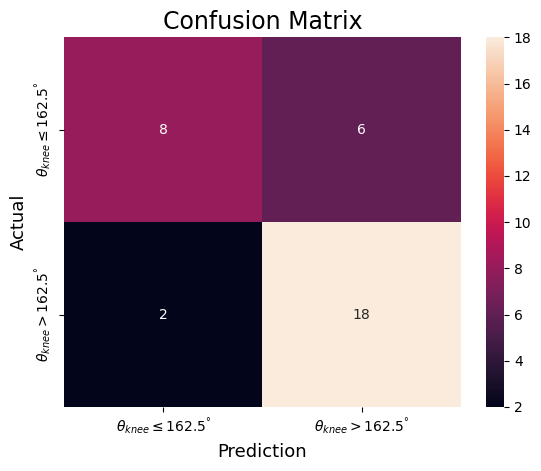

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#cm = confusion_matrix(actual, predicted)

#Plot the confusion matrix.
labels = [r"$\theta_{knee} \leq {162.5}^{\degree}$",  r"$\theta_{knee} > {162.5}^{\degree}$"]
sns.heatmap(cm_json, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)

plt.savefig(plot_save_path)
plt.show()

In [ ]:
# テストラベル 0: 14, 1: 20
TN = cm_json[0][0]
FP = cm_json[0][1]

FN = cm_json[1][0]
TP = cm_json[1][1]

print(f'TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}')

TN: 8, FP: 6, FN: 2, TP: 18


In [ ]:
# accuracy
# (TP+TN) / (TP+TN+FP+FN)

acc = (TP+TN) / (TP+TN+FP+FN)
print('acc: ', acc)

acc:  0.7647058823529411


In [ ]:
# precision
# TP / (TP + FP)

precision = TP / (TP + FP)
print('precision: ', precision)

precision:  0.9


In [ ]:
# recall
# TP / (TP + FN)

recall = TP / (TP + FN)
print('recall: ', recall)

recall:  0.75


### テストデータのラベル読み込み（確認用）

In [ ]:
import os
import pandas as pd

def get_csv_data(dataset_root, csv_file_name, display_csv=True):
    dataset_path = os.path.join(dataset_root, csv_file_name)
    print('データセットパス : ', dataset_path)

    df = pd.read_csv(dataset_path)

    if display_csv:
        display(df)

    return dataset_path, df

In [ ]:
# CSVテストデータ読み込み
dataset_root = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/"

dataset_path, df = get_csv_data(dataset_root, f'val_video_action_labels.csv', display_csv=True)


データセットパス :  /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/val_video_action_labels.csv


,video,pred,true
0,GH010320_1_mmaction_takeoff_pike_5_76_0.mp4,0,0
1,GH010320_2_mmaction_takeoff_pike_4_78_0.mp4,0,0
2,GH010322_mmaction_takeoff_pike_0_77_0.mp4,0,0
3,GH010324_1_mmaction_takeoff_pike_1_74_1.mp4,0,1
4,GH010324_2_mmaction_takeoff_pike_10_89_0.mp4,0,0
5,GH010330_mmaction_takeoff_pike_8_71_0.mp4,0,0
6,GH010331_1_mmaction_takeoff_pike_5_76_0.mp4,0,0
7,GH010331_2_mmaction_takeoff_pike_7_81_1.mp4,0,1
8,GH010659_mmaction_takeoff_pike_8_83_1.mp4,1,1
9,GH010660_mmaction_takeoff_pike_9_81_1.mp4,1,1


In [ ]:
y_test = df["true"]
y_pred = df["pred"]

print("y_test: ", y_test.tolist())
print("y_pred: ", y_pred.tolist())

y_test:  [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
y_pred:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)

# sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
# plt.savefig('/content/sklearn_confusion_matrix.png')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("正解率: ", accuracy_score(y_test, y_pred))
print("適合率: ", precision_score(y_test, y_pred))
print("再現率: ", recall_score(y_test, y_pred))

正解率:  0.6764705882352942
適合率:  0.7142857142857143
再現率:  0.75


In [ ]:
# %cd /content/mmaction2
# !python tools/analysis_tools/eval_metric.py \
#     $config_file_path \
#     $pickle_save_path \
#     --cfg-options type= \

### 動画可視化

In [ ]:
!python demo/demo_skeleton.py \
    --config "$config_file_path" \
    --checkpoint "$ckpt_model_path" \
    --label-map "$label_map_path" \
    "$video_path" "$output_path" "$csv_path"

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

### Grad-cam適用

In [ ]:
!python tools/visualizations/vis_cam.py "$config_file_path" "$ckpt_model_path" "$video_path" --target-layer-name backbone/layer4/1/relu --out-filename "$cam_output_path"

Loads checkpoint by local backend from path: /content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/trained_models/knee_angle_from_pretrained_gym/best_acc_top1_epoch_17.pth
keys:  dict_keys(['filename', 'label', 'start_index', 'modality'])
modality:  RGB
total frames:  72.0
Traceback (most recent call last):
  File "/content/mmaction2/tools/visualizations/vis_cam.py", line 205, in <module>
    main()
  File "/content/mmaction2/tools/visualizations/vis_cam.py", line 176, in main
    inputs = build_inputs(model, args.video, use_frames=args.use_frames)
  File "/content/mmaction2/tools/visualizations/vis_cam.py", line 114, in build_inputs
    data = test_pipeline(data)
  File "/usr/local/lib/python3.10/dist-packages/mmengine/dataset/base_dataset.py", line 58, in __call__
    data = t(data)
  File "/usr/local/lib/python3.10/dist-packages/mmcv/transforms/base.py", line 12, in __call__
    return self.transform(results)
  File "/content/mmaction2/mmaction/datasets/transforms/pose_tra

In [ ]:
#!wget https://download.openmmlab.com/mmaction/v1.0/skeleton/data/ntu60_2d.pkl -O /content/drive/MyDrive/D3/2本目/mmaction/ntu60_2d.pkl

### skeleton based preprocess

In [ ]:
pickle_path = "/content/GH010659_mmaction_takeoff_pike_8_83.pkl"
pickle_path = "/content/drive/MyDrive/D3/2本目/mmaction/gym_2d.pkl"
pickle_path = "/content/drive/MyDrive/D3/2本目/mmaction/ntu60_2d.pkl"
#pickle_path = "/content/drive/MyDrive/D3/2本目/skeleton_based_dataset/knee_angle/knee_angle_custom_data.pkl"

In [ ]:
%cd /content/mmaction2
# You can use the above command to generate pickle files for all of your training and validation videos.
!python tools/data/skeleton/ntu_pose_extraction.py --skip-postproc "GH010659_mmaction_takeoff_pike_8_83_1.mp4" "$pickle_path"

/content/mmaction2
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco-person/faster_rcnn_r50_fpn_1x_coco-person_20201216_175929-d022e227.pth
Performing Human Detection for each frame
[                                                  ] 0/76, elapsed: 0s, ETA:09/15 09:18:39 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
09/15 09:18:39 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
[>>] 76/76, 21.1 task/s, elapsed: 4s, ETA:     0s
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth
/usr/local/lib/python3.10/dist-packages/mmpose/apis/inference.py:120: UserWarning: Can not load dataset_meta from the checkpoint or the model config. Use COCO met

In [ ]:
!python -m pickle $pickle_path

{'frame_dir': 'GH010659_mmaction_takeoff_pike_8_83_1',
 'img_shape': (1080, 1920),
 'keypoint': array([[[[1741.8541 ,  534.98566],
         [1752.8518 ,  527.6539 ],
         [1741.8541 ,  527.6539 ],
         ...,
         [1855.4967 ,  784.2663 ],
         [1818.8378 ,  839.2547 ],
         [1917.8169 ,  835.5888 ]],

        [[1720.6119 ,  536.04596],
         [1731.7233 ,  524.9347 ],
         [1720.6119 ,  528.6384 ],
         ...,
         [1842.836  ,  776.7904 ],
         [1776.1683 ,  847.1618 ],
         [1916.9113 ,  836.05054]],

        [[1701.4552 ,  531.9911 ],
         [1712.9438 ,  524.33203],
         [1701.4552 ,  524.33203],
         ...,
         [1827.8297 ,  777.081  ],
         [1739.7505 ,  853.6716 ],
         [1912.0793 ,  830.6944 ]],

        ...,

        [[ 753.33624,  278.7122 ],
         [ 743.6195 ,  275.47327],
         [ 746.8584 ,  275.47327],
         ...,
         [ 831.0701 ,  268.99545],
         [ 934.7153 ,  366.16278],
         [ 850.50354,  

In [ ]:
import pickle

with open(pickle_path, mode="rb") as f:
    hoge = pickle.load(f)
#hoge

In [ ]:
type(hoge)

dict

In [ ]:
#hoge[0]

In [ ]:
'num_person_raw'

In [ ]:
# custom
hoge["split"].keys()

dict_keys(['xsub_train', 'xsub_val'])

In [ ]:
hoge["split"]

{'xsub_train': ['GH010550_mmaction_takeoff_pike_51_129.pkl',
  'GH010551_mmaction_takeoff_pike_55_136.pkl',
  'GH010552_mmaction_takeoff_pike_50_119.pkl',
  'GH010553_mmaction_takeoff_pike_48_131.pkl',
  'GH010554_mmaction_takeoff_pike_67_144.pkl',
  'GH010556_mmaction_takeoff_pike_70_147.pkl',
  'GH010557_mmaction_takeoff_pike_56_141.pkl',
  'GH010558_mmaction_takeoff_pike_47_125.pkl',
  'GH010560_mmaction_takeoff_pike_17_95.pkl',
  'GH010561_mmaction_takeoff_pike_62_137.pkl',
  'GH010580_mmaction_takeoff_pike_9_86.pkl',
  'GH010581_mmaction_takeoff_pike_14_97.pkl',
  'GH010582_mmaction_takeoff_pike_13_90.pkl',
  'GH010587_mmaction_takeoff_pike_6_79.pkl',
  'GH010589_mmaction_takeoff_pike_10_88.pkl',
  'GH010590_mmaction_takeoff_pike_10_85.pkl',
  'GH010591_mmaction_takeoff_pike_10_58.pkl',
  'GH010593_mmaction_takeoff_pike_11_82.pkl',
  'GH010594_mmaction_takeoff_pike_12_88.pkl',
  'GH010595_mmaction_takeoff_pike_9_87.pkl',
  'GH010596_mmaction_takeoff_pike_11_87.pkl',
  'GH010597_mm

In [ ]:
# ntu
hoge["split"].keys()

dict_keys(['xsub_train', 'xsub_val', 'xview_train', 'xview_val'])

In [ ]:
hoge["split"]

{'xsub_train': ['S001C001P001R001A001',
  'S001C001P001R001A002',
  'S001C001P001R001A003',
  'S001C001P001R001A004',
  'S001C001P001R001A005',
  'S001C001P001R001A006',
  'S001C001P001R001A007',
  'S001C001P001R001A008',
  'S001C001P001R001A009',
  'S001C001P001R001A010',
  'S001C001P001R001A011',
  'S001C001P001R001A012',
  'S001C001P001R001A013',
  'S001C001P001R001A014',
  'S001C001P001R001A015',
  'S001C001P001R001A016',
  'S001C001P001R001A017',
  'S001C001P001R001A018',
  'S001C001P001R001A019',
  'S001C001P001R001A020',
  'S001C001P001R001A021',
  'S001C001P001R001A022',
  'S001C001P001R001A023',
  'S001C001P001R001A024',
  'S001C001P001R001A025',
  'S001C001P001R001A026',
  'S001C001P001R001A027',
  'S001C001P001R001A028',
  'S001C001P001R001A029',
  'S001C001P001R001A030',
  'S001C001P001R001A031',
  'S001C001P001R001A032',
  'S001C001P001R001A033',
  'S001C001P001R001A034',
  'S001C001P001R001A035',
  'S001C001P001R001A036',
  'S001C001P001R001A037',
  'S001C001P001R001A038'

In [ ]:
hoge['annotations']